# Case Study: Mental Health in Technology-Related Jobs  
**Course:** Machine Learning – Unsupervised Learning (DLBDSMLUSL01)  
**Student:** Kush Tripathi
**Link to GitHub:** https://github.com/KushTrip/Mental_Health_Unsupervised_M.L.git
---

## 📖 Project Contents (Overview of total 23 Code Cells)

---

### 1. Importing & Loading the Dataset  
**Code Blocks 1–2**  
- Imported essential Python libraries (Pandas, NumPy, Scikit-learn, Matplotlib, Seaborn).
- Loaded the mental health survey dataset (Kaggle, 2016).
- Previewed initial rows to understand the structure.

---

### 2. Exploratory Data Analysis (EDA) & Column Simplification  
**Code Blocks 3–4**  
- Inspected shape, missing values, data types, column names.
- Renamed long column headers into clean, simple names for easier processing and readability.

---

### 3. Data Cleaning & Encoding  
**Code Blocks 5–6**  
- Filled missing values: “Unknown” for object/text columns, `0` for numeric columns.
- Applied one-hot encoding to convert categorical variables into numeric format for ML algorithms.

---

### 4. Dimensionality Reduction  
**Code Blocks 7, 16, 17**  
- Used PCA to reduce the dataset to 2 dimensions.
- Visualized top contributing features to PCA1 & PCA2 using heatmap.
- Used MDS (Multidimensional Scaling) to create a “Swiss Roll” 2D visualization of the data.

---

### 5. Clustering & Cluster Evaluation  
**Code Blocks 8–15**  
- Applied K-Means Clustering (`k=2`) with Elbow Method and Silhouette Score to confirm best cluster count.
- Visualized clusters using PCA-reduced dimensions.
- Analyzed dominant features in each cluster.
- Applied Gaussian Mixture Model (GMM) clustering for comparison.
- Plotted dendrogram using Hierarchical Clustering (Ward’s linkage).

---

### 6. Feature Engineering  
**Code Blocks 18–21**  
- Created new features such as:
  - `log_age` (log-transformed age),
  - `age_productivity` (interaction of age × productivity),
  - `position_remote_combo` (work type + remote status),
  - `works_in_USA` (binary indicator).
- These help ML algorithms understand patterns better.

---

### 7. Feature Selection & Evaluation  
**Code Blocks 22–23**  
- Removed low-variance features using `VarianceThreshold`.
- Analyzed correlation matrix of key numeric features like age and productivity.
- Created visual heatmaps to spot linear relationships and redundancies.

---

## Tools & Techniques Used  
- **Clustering:** K-Means, GMM, Hierarchical  
- **Dimensionality Reduction:** PCA, MDS  
- **Feature Engineering:** Transformation, Interaction, Encoding  
- **Feature Selection:** Variance Threshold, Correlation Matrix  
- **Visualization:** Heatmaps, Dendrograms, PCA Scatterplots  

---

## Credits  
- Data: Kaggle - OSMI Mental Health in Tech Survey (2016)  
- Inspiration: IUBH GithHub code repository for Unsupervised M.L + course Book

---

## Conclusion
- Overview of creating the project as per goals mentioned in Task
---




**Block 1: Importing Libraries**

Purpose: Loads essential libraries for:
- Data manipulation (pandas, numpy)
- Visualization (matplotlib, seaborn)
- Machine learning (StandardScaler, PCA, KMeans)

In [1]:
# Step 1: Install and import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

print("Libraries imported successfully 🎉")


Libraries imported successfully 🎉


**Block 2: Load and Preview the Dataset**

Purpose: Loads the CSV and displays the first few rows to understand the structure and get an overview.

In [2]:
# Step 2: Load the dataset
df = pd.read_csv('/content/mental-heath-in-tech-2016_20161114.csv')

# Display the first 5 rows to understand the data
df.head()


,Are you self-employed?,How many employees does your company or organization have?,Is your employer primarily a tech company/organization?,Is your primary role within your company related to tech/IT?,Does your employer provide mental health benefits as part of healthcare coverage?,Do you know the options for mental health care available under your employer-provided coverage?,"Has your employer ever formally discussed mental health (for example, as part of a wellness campaign or other official communication)?",Does your employer offer resources to learn more about mental health concerns and options for seeking help?,Is your anonymity protected if you choose to take advantage of mental health or substance abuse treatment resources provided by your employer?,"If a mental health issue prompted you to request a medical leave from work, asking for that leave would be:",...,"If you have a mental health issue, do you feel that it interferes with your work when being treated effectively?","If you have a mental health issue, do you feel that it interferes with your work when NOT being treated effectively?",What is your age?,What is your gender?,What country do you live in?,What US state or territory do you live in?,What country do you work in?,What US state or territory do you work in?,Which of the following best describes your work position?,Do you work remotely?
0,0,26-100,1.0,NaN,Not eligible for coverage / N/A,NaN,No,No,I don't know,Very easy,...,Not applicable to me,Not applicable to me,39,Male,United Kingdom,NaN,United Kingdom,NaN,Back-end Developer,Sometimes
1,0,6-25,1.0,NaN,No,Yes,Yes,Yes,Yes,Somewhat easy,...,Rarely,Sometimes,29,male,United States of America,Illinois,United States of America,Illinois,Back-end Developer|Front-end Developer,Never
2,0,6-25,1.0,NaN,No,NaN,No,No,I don't know,Neither easy nor difficult,...,Not applicable to me,Not applicable to me,38,Male,United Kingdom,NaN,United Kingdom,NaN,Back-end Developer,Always
3,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,Sometimes,Sometimes,43,male,United Kingdom,NaN,United Kingdom,NaN,Supervisor/Team Lead,Sometimes
4,0,6-25,0.0,1.0,Yes,Yes,No,No,No,Neither easy nor difficult,...,Sometimes,Sometimes,43,Female,United States of America,Illinois,United States of America,Illinois,Executive Leadership|Supervisor/Team Lead|Dev ...,Sometimes


**Block 3: Initial Data Exploration**

Purpose:
- Understand size
- Check for missing values
- View column names and types
- Summarize numeric fields

In [3]:
# Step 3: Check shape (rows and columns)
print("Shape of dataset:", df.shape)

# Check for missing values
print("\nMissing values per column:\n")
print(df.isnull().sum())

# Check all the column names
print("\nColumn Names:\n")
print(df.columns)

# Check data types
print("\nData Types:\n")
print(df.dtypes)

# Quick summary of numerical columns
df.describe()


Shape of dataset: (1433, 63)

Missing values per column:

Are you self-employed?                                                                  0
How many employees does your company or organization have?                            287
Is your employer primarily a tech company/organization?                               287
Is your primary role within your company related to tech/IT?                         1170
Does your employer provide mental health benefits as part of healthcare coverage?     287
                                                                                     ... 
What US state or territory do you live in?                                            593
What country do you work in?                                                            0
What US state or territory do you work in?                                            582
Which of the following best describes your work position?                               0
Do you work remotely?                     

,Are you self-employed?,Is your employer primarily a tech company/organization?,Is your primary role within your company related to tech/IT?,Do you have medical coverage (private insurance or state-provided) which includes treatment of mental health issues?,Do you have previous employers?,Have you ever sought treatment for a mental health issue from a mental health professional?,What is your age?
count,1433.000000,1146.000000,263.000000,287.000000,1433.000000,1433.000000,1433.000000
mean,0.200279,0.770506,0.942966,0.644599,0.882066,0.585485,34.286113
std,0.400349,0.420691,0.232350,0.479471,0.322643,0.492810,11.290931
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000
25%,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,28.000000
50%,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,33.000000
75%,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,39.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,323.000000


**Block 4: Renaming Columns for Simplicity**

Purpose: Renames long survey question columns into simpler names to make further processing easier.

In [4]:
# Renaming columns for simplicity
df_cleaned=df.copy()
df_cleaned.rename(columns={
    'Are you self-employed?': 'self-employed',
    'How many employees does your company or organization have?': 'total-employees',
    'Is your employer primarily a tech company/organization?': 'tech-based-employer',
    'Is your primary role within your company related to tech/IT?': 'tech-related-role',
    'Does your employer provide mental health benefits as part of healthcare coverage?': 'mental-health-benefits',
    'Do you know the options for mental health care available under your employer-provided coverage?': 'options_for_mental-health',
    'Has your employer ever formally discussed mental health (for example, as part of a wellness campaign or other official communication)?': 'employer_discussed_mental-health',
       'Does your employer offer resources to learn more about mental health concerns and options for seeking help?': 'employer_offer_resources',
       'Is your anonymity protected if you choose to take advantage of mental health or substance abuse treatment resources provided by your employer?': 'anonymity_protected',
       'If a mental health issue prompted you to request a medical leave from work, asking for that leave would be:': 'leave_request',
       'Do you think that discussing a mental health disorder with your employer would have negative consequences?': 'discuss_mh_neg',
       'Do you think that discussing a physical health issue with your employer would have negative consequences?': 'discuss_ph_neg',
       'Would you feel comfortable discussing a mental health disorder with your coworkers?': 'comfort_discuss_coworkers',
       'Would you feel comfortable discussing a mental health disorder with your direct supervisor(s)?': 'comfort_discuss_supervisor',
       'Do you feel that your employer takes mental health as seriously as physical health?': 'employer_takes_mh_seriously',
       'Have you heard of or observed negative consequences for co-workers who have been open about mental health issues in your workplace?': 'observed_neg_consequences_coworkers',
       'Do you have medical coverage (private insurance or state-provided) which includes treatment of  mental health issues?': 'medical_coverage_mh',
       'Do you know local or online resources to seek help for a mental health disorder?': 'know_resources_mh',
       'If you have been diagnosed or treated for a mental health disorder, do you ever reveal this to clients or business contacts?': 'reveal_to_clients',
       'If you have revealed a mental health issue to a client or business contact, do you believe this has impacted you negatively?': 'impact_clients',
       'If you have been diagnosed or treated for a mental health disorder, do you ever reveal this to coworkers or employees?': 'reveal_to_coworkers',
       'If you have revealed a mental health issue to a coworker or employee, do you believe this has impacted you negatively?': 'impact_coworker_reveal',
       'Do you believe your productivity is ever affected by a mental health issue?': 'productivity_affected_mh',
       'If yes, what percentage of your work time (time performing primary or secondary job functions) is affected by a mental health issue?': 'percentage_time_affected_mh',
       'Do you have previous employers?': 'previous_employers',
       'Have your previous employers provided mental health benefits?': 'prev_employers_provided_mh',
       'Were you aware of the options for mental health care provided by your previous employers?': 'aware_options_prev_employers_mh',
       'Did your previous employers ever formally discuss mental health (as part of a wellness campaign or other official communication)?': 'discussed_mh_prev_employers',
       'Did your previous employers provide resources to learn more about mental health issues and how to seek help?': 'resources_prev_employers_mh',
       'Was your anonymity protected if you chose to take advantage of mental health or substance abuse treatment resources with previous employers?': 'anonymity_prev_employers_mh',
       'Do you think that discussing a mental health disorder with previous employers would have negative consequences?': 'discuss_mh_prev_employers_neg',
       'Do you think that discussing a physical health issue with previous employers would have negative consequences?': 'discuss_ph_prev_employers_neg',
       'Would you have been willing to discuss a mental health issue with your previous co-workers?': 'willing_discuss_mh_prev_coworkers',
       'Would you have been willing to discuss a mental health issue with your direct supervisor(s)?': 'willing_discuss_mh_prev_supervisor',
       'Did you feel that your previous employers took mental health as seriously as physical health?': 'prev_employers_take_mh_seriously',
       'Did you hear of or observe negative consequences for co-workers with mental health issues in your previous workplaces?': 'observed_neg_consequences_prev_coworkers',
       'Would you be willing to bring up a physical health issue with a potential employer in an interview?': 'bring_up_ph_interview',
       'Why or why not?': 'why_not_ph_interview',
       'Would you bring up a mental health issue with a potential employer in an interview?': 'dbring_up_mh_interview',
       'Why or why not?.1': 'why_not_mh_interview',
       'Do you feel that being identified as a person with a mental health issue would hurt your career?': 'identified_mh_issue_hurt_career',
       'Do you think that team members/co-workers would view you more negatively if they knew you suffered from a mental health issue?': 'coworkers_view_negatively_mh_issue',
       'How willing would you be to share with friends and family that you have a mental illness?': 'willing_share_friends_family_mh_illness',
       'Have you observed or experienced an unsupportive or badly handled response to a mental health issue in your current or previous workplace?': 'observed_unsupportive_response_mh_workplace',
       'Have your observations of how another individual who discussed a mental health disorder made you less likely to reveal a mental health issue yourself in your current workplace?': 'observed_individual_discuss_mh_less_likely_reveal_mh',
       'Do you have a family history of mental illness?': 'family_history_mh',
       'Have you had a mental health disorder in the past?': 'had_mh_disorder_past',
       'Do you currently have a mental health disorder?': 'currently_have_mh_disorder',
       'If yes, what condition(s) have you been diagnosed with?': 'gender',
       'If maybe, what condition(s) do you believe you have?': 'gender',
       'Have you been diagnosed with a mental health condition by a medical professional?': 'conditions_diagnosed',
       'If so, what condition(s) were you diagnosed with?': 'what_conditions_diagnosed',
       'Have you ever sought treatment for a mental health issue from a mental health professional?': 'treatment_from_professional',
       'If you have a mental health issue, do you feel that it interferes with your work when being treated effectively?': 'interfere_with_work_treated',
       'If you have a mental health issue, do you feel that it interferes with your work when NOT being treated effectively?': 'interfere_with_work_if_not_treated',
       'What is your age?': 'age',
       'What is your gender?': 'gender',
       'What country do you live in?': 'country-name',
       'What US state or territory do you live in?': 'state_territory_name',
       'What country do you work in?': 'country_work',
       'What US state or territory do you work in?': 'state_territory_work',
       'Which of the following best describes your work position?': 'work_position',
       'Do you work remotely?': 'work_remotely',
}, inplace=True)

**Block 5: Handling Missing Values**

Purpose : Fills missing values with 'Unknown' (categorical) or 0 (numerical)

In [5]:
import pandas as pd

# Final cleanup with proper data type checking
for col in df_cleaned.columns:
    if pd.api.types.is_object_dtype(df_cleaned[col]):
        df_cleaned[col] = df_cleaned[col].fillna("Unknown")
    else:
        df_cleaned[col] = df_cleaned[col].fillna(0)

print("✔️ Missing values filled with 'Unknown' or 0")
print("Final shape:", df_cleaned.shape)

✔️ Missing values filled with 'Unknown' or 0
Final shape: (1433, 63)


**Block 6: One-Hot Encoding**

Purpose: Converts categorical columns into numerical form using one-hot encoding, preparing the data for ML algorithms.

In [24]:
# Step 6: One-Hot Encode categorical variables
df_encoded = pd.get_dummies(df_cleaned)

# Let’s check the shape after encoding
print("Encoding complete")
print("New shape after encoding:", df_encoded.shape)


Encoding complete
New shape after encoding: (1433, 3624)


**Block 7: PCA for Dimensionality Reduction**

Purpose: Standardizes data and applies Principal Component Analysis (PCA) to reduce high dimensionality to 2D, preserving key variance.

In [7]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Standardize data (important for PCA)
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_encoded)

# Apply PCA
pca = PCA(n_components=2)
pca_result = pca.fit_transform(df_scaled)

# Turn into a new DataFrame
df_pca = pd.DataFrame(pca_result, columns=['PCA1', 'PCA2'])

# Show result
print(" PCA applied. Here’s what the new data looks like:")
df_pca.head()


 PCA applied. Here’s what the new data looks like:


,PCA1,PCA2
0,-2.436212,0.061301
1,-3.349990,2.378241
2,-2.046608,0.181228
3,12.372476,2.415244
4,-2.610534,3.059294


from matplotlib import pyplot as plt
_df_0['PCA1'].plot(kind='hist', bins=20, title='PCA1')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_1['PCA2'].plot(kind='hist', bins=20, title='PCA2')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_2.plot(kind='scatter', x='PCA1', y='PCA2', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_3['PCA1'].plot(kind='line', figsize=(8, 4), title='PCA1')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_4['PCA2'].plot(kind='line', figsize=(8, 4), title='PCA2')
plt.gca().spines[['top', 'right']].set_visible(False)

**Block 8: Apply Clustering (K-Means)**

Purpose: Uses unsupervised ML (KMeans) to group individuals into clusters based on PCA-reduced features.

In [8]:
from sklearn.cluster import KMeans

# Apply k-Means Clustering
kmeans = KMeans(n_clusters=2, random_state=42)
kmeans.fit(df_pca)

# Add cluster labels to the PCA dataframe
df_pca['Cluster'] = kmeans.labels_

print("Clustering complete. Cluster labels added!")
df_pca.head()


Clustering complete. Cluster labels added!


,PCA1,PCA2,Cluster
0,-2.436212,0.061301,0
1,-3.349990,2.378241,0
2,-2.046608,0.181228,0
3,12.372476,2.415244,1
4,-2.610534,3.059294,0


from matplotlib import pyplot as plt
_df_5['PCA1'].plot(kind='hist', bins=20, title='PCA1')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_6['PCA2'].plot(kind='hist', bins=20, title='PCA2')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_7['Cluster'].plot(kind='hist', bins=20, title='Cluster')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_8.plot(kind='scatter', x='PCA1', y='PCA2', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_9.plot(kind='scatter', x='PCA2', y='Cluster', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_10['PCA1'].plot(kind='line', figsize=(8, 4), title='PCA1')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_11['PCA2'].plot(kind='line', figsize=(8, 4), title='PCA2')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_12['Cluster'].plot(kind='line', figsize=(8, 4), title='Cluster')
plt.gca().spines[['top', 'right']].set_visible(False)

**Block 9: Cluster Visualization**

Purpose: Plots clustered participants in 2D space using the two PCA components.

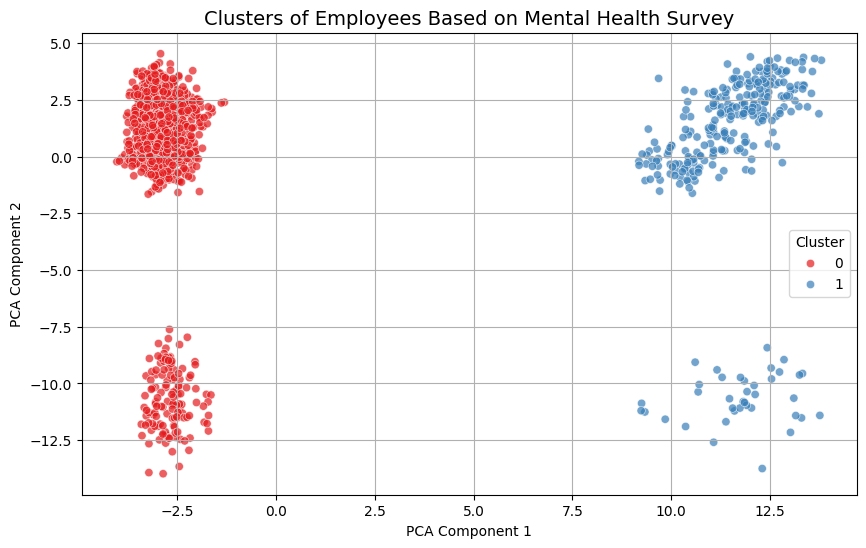

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set plot style
plt.figure(figsize=(10, 6))
sns.scatterplot(x='PCA1', y='PCA2', hue='Cluster', data=df_pca, palette='Set1', alpha=0.7)

# Add titles
plt.title("Clusters of Employees Based on Mental Health Survey", fontsize=14)
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.legend(title='Cluster')
plt.grid(True)
plt.show()

**Block 10: Analyzing Each Cluster**

Purpose:
- Merges original survey data with cluster labels
- Extracts most common attributes for each cluster

In [10]:
# Merge PCA + original data to analyze clusters
df_clustered = pd.concat([df_cleaned.reset_index(drop=True), df_pca['Cluster']], axis=1)

# View size of each group
print("Number of people in each cluster:")
print(df_clustered['Cluster'].value_counts())

# Show the most common features in each group
for i in range(2):
    print(f"\n Cluster {i} summary:")
    print(df_clustered[df_clustered['Cluster'] == i].mode().iloc[0])


Number of people in each cluster:
Cluster
0    1146
1     287
Name: count, dtype: int64

 Cluster 0 summary:
self-employed                                    0
total-employees                             26-100
tech-based-employer                            1.0
tech-related-role                              0.0
mental-health-benefits                         Yes
                                    ...           
country_work              United States of America
state_territory_work                       Unknown
work_position                   Back-end Developer
work_remotely                            Sometimes
Cluster                                          0
Name: 0, Length: 64, dtype: object

 Cluster 1 summary:
self-employed                                  1.0
total-employees                            Unknown
tech-based-employer                            0.0
tech-related-role                              0.0
mental-health-benefits                     Unknown
                   

What these Clusters might Mean (for HR)

***Cluster 0*** (Majority group – 1146 people):
- Most work in medium-sized tech companies (26–100 employees)
- Have access to mental health benefits
- Usually not in tech-specific roles
- Position: often Back-end Developer
- Remote work: Sometimes

Interpretation: Likely employees in stable, mid-sized firms with support structures in place.

💡 HR Insight: This group is structured and supported—continue investing in mental health programs here.

***Cluster 1*** (Smaller group – 287 people):
- Mostly self-employed, one-person teams
- Many answered "Unknown" for benefits
- Don’t work in tech-based companies
- Often do non-tech roles
- Work alone or in non-traditional setups

Interpretation: Likely isolated or freelance workers with minimal access to support systems—key HR target group.

💡 HR Insight: This group might not be reached by current support structures. Consider programs for freelancers/contractors or raise awareness.



**Block 11: Determine Optimal Number of Clusters (Elbow Method)**

Purpose: This block helps decide the best number of clusters (k) by:
- Running KMeans clustering for different values of k from 1 to 10
- Plotting the inertia (how tight the clusters are) for each
- Using the Elbow Method to visually pick the point where adding more clusters doesn't significantly improve the results

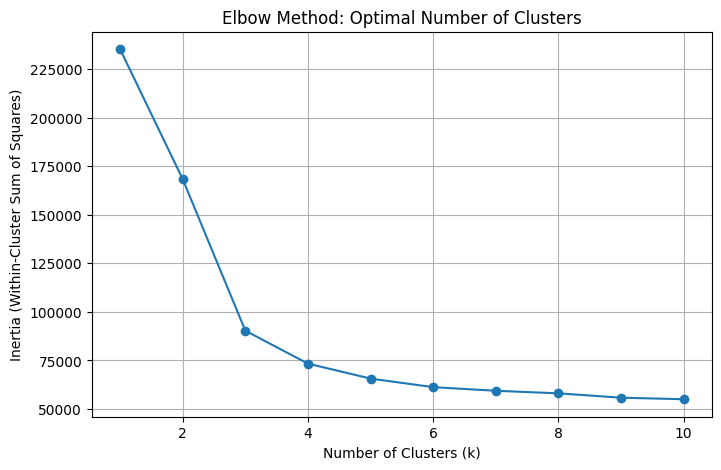

In [11]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Try k from 1 to 10
inertia = []
k_range = range(1, 11)

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df_encoded)  # use the full feature set
    inertia.append(kmeans.inertia_)

# Plot the elbow curve
plt.figure(figsize=(8, 5))
plt.plot(k_range, inertia, marker='o')
plt.title('Elbow Method: Optimal Number of Clusters')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia (Within-Cluster Sum of Squares)')
plt.grid(True)
plt.show()


***Elbow Method Result***

The curve sharply drops until k = 2 or 4

After that, the gains (i.e., reduced inertia) start flattening

This means: k = 2 or 4 is a sweet spot

**Block 12: Silhouette Score Analysis**

Purpose:
- Calculates silhouette scores for k = 2 to 10 to measure how well-separated and well-formed clusters are.
- Visualizes the score to help justify the number of clusters chosen.



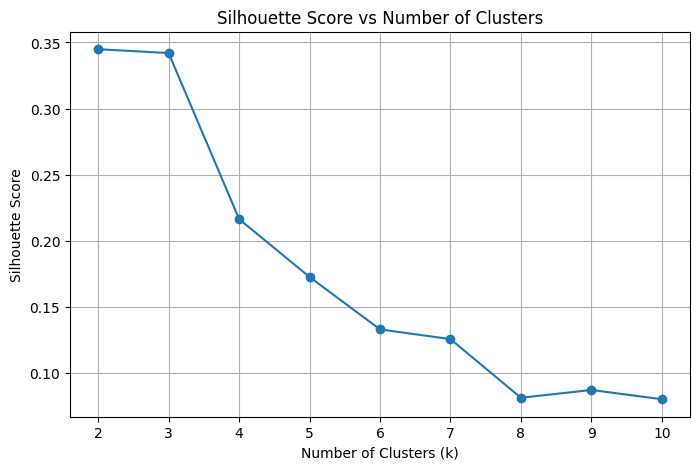

In [12]:
from sklearn.metrics import silhouette_score

# Try silhouette scores for k = 2 to 10
silhouette_scores = []

for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(df_encoded)
    score = silhouette_score(df_encoded, labels)
    silhouette_scores.append(score)

# Plot silhouette scores
plt.figure(figsize=(8, 5))
plt.plot(range(2, 11), silhouette_scores, marker='o')
plt.title('Silhouette Score vs Number of Clusters')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.grid(True)
plt.show()


***Silhouette Score Result***

k = 2 gave the highest silhouette score (~0.35)

That means the clusters are most clearly separated at 2 groups

So, based on both Silhoutte & Elbow methods, Best Cluster Count for This Data = 2

**Block 13: Gaussian Mixture Model (GMM) Clustering**

Purpose:
- Applies another clustering technique (GMM) for comparison with KMeans.
- Uses the same number of components (2) as chosen in KMeans.
- Visualizes GMM clusters in the 2D PCA-reduced space.

This strengthens our project by applying and comparing multiple clustering algorithms. It also improves interpretability, which helps HR get a clearer view from different angles.

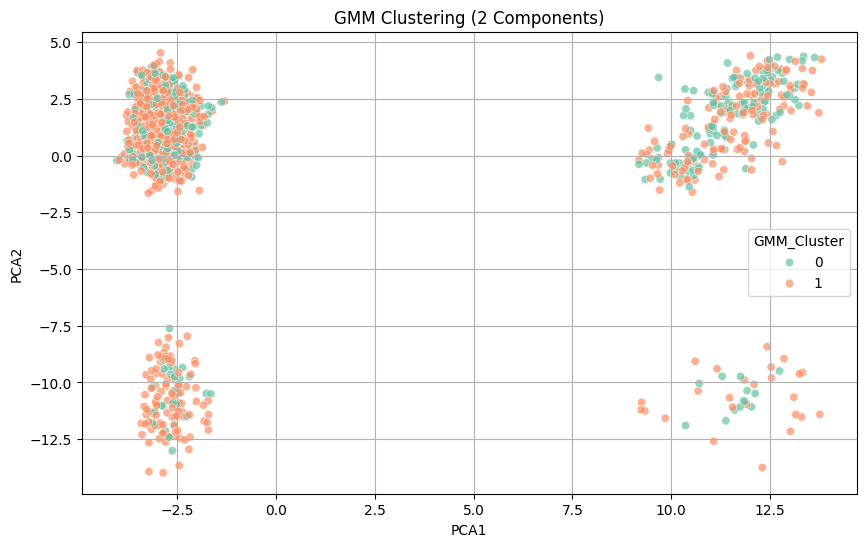

In [13]:
from sklearn.mixture import GaussianMixture
import seaborn as sns
import matplotlib.pyplot as plt

# Fit GMM with 2 components (same as optimal k from k-means)
gmm = GaussianMixture(n_components=2, random_state=42)
gmm_labels = gmm.fit_predict(df_encoded)

# Add to PCA dataframe
df_pca['GMM_Cluster'] = gmm_labels

# Plot
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_pca, x='PCA1', y='PCA2', hue='GMM_Cluster', palette='Set2', alpha=0.7)
plt.title("GMM Clustering (2 Components)")
plt.xlabel("PCA1")
plt.ylabel("PCA2")
plt.grid(True)
plt.show()


We now have two clustering models to compare:
- K-means: simpler, cleaner boundaries
- GMM: more flexible, probabilistic

**Block 14: Analyze GMM Clusters**

 Purpose:
- Merges the GMM cluster labels with the cleaned dataset.
- Shows how many participants fall into each cluster.
- Displays the most common answers (mode) in each cluster to identify distinguishing characteristics.


In [14]:
# Merge GMM cluster labels into cleaned dataset
df_clustered_gmm = pd.concat([df_cleaned.reset_index(drop=True), df_pca['GMM_Cluster']], axis=1)

# Show group sizes
print("Number of people in each GMM cluster:")
print(df_clustered_gmm['GMM_Cluster'].value_counts())

# Show dominant features per group
for i in range(2):
    print(f"\n GMM Cluster {i} summary:")
    print(df_clustered_gmm[df_clustered_gmm['GMM_Cluster'] == i].mode().iloc[0])


Number of people in each GMM cluster:
GMM_Cluster
1    960
0    473
Name: count, dtype: int64

 GMM Cluster 0 summary:
self-employed                                    0
total-employees                            Unknown
tech-based-employer                            1.0
tech-related-role                              0.0
mental-health-benefits                         Yes
                                    ...           
country_work              United States of America
state_territory_work                       Unknown
work_position                   Back-end Developer
work_remotely                            Sometimes
GMM_Cluster                                      0
Name: 0, Length: 64, dtype: object

 GMM Cluster 1 summary:
self-employed                                    0
total-employees                             26-100
tech-based-employer                            1.0
tech-related-role                              0.0
mental-health-benefits                         Yes
     

**GMM Clustering Result (k = 2)**

Cluster 1 – 960 people
- Not self-employed
- Work in 26–100 employee firms
- Have mental health benefits
- Often Back-end Developers
- Work sometimes remotely

💡 Very similar to our k-means Cluster 0 → reinforces that this is a majority well-supported group

Cluster 0 – 473 people
- Also not self-employed
- But company size marked as “Unknown”
- Still have benefits and tech employer
- Similar job role and work setup

💡 Slight variation from k-means: GMM is grouping based on uncertainty and fuzziness, which may capture people in ambiguous or data-missing situations

**K-Means vs GMM – Report:**

In addition to k-means clustering, a Gaussian Mixture Model (GMM) was applied. Unlike k-means, which uses hard boundaries, GMM assigns probabilities of belonging to each group. Interestingly, GMM produced two groups that were similar to those discovered with k-means, but the boundaries were more fluid. One group contained workers with strong organizational structures and access to mental health benefits. The other, while also in tech environments, was more ambiguous due to missing data such as company size. This shows that GMM is effective in capturing soft patterns in complex human behavior datasets.

**Block 15: Hierarchical Clustering with Dendrogram**

 Purpose:
- Applies hierarchical clustering to the first 200 participants (for readability).
- Groups people by similarity and builds a tree-like structure (dendrogram).
- Visualizes the cluster relationships and distances between participants using a dendrogram.

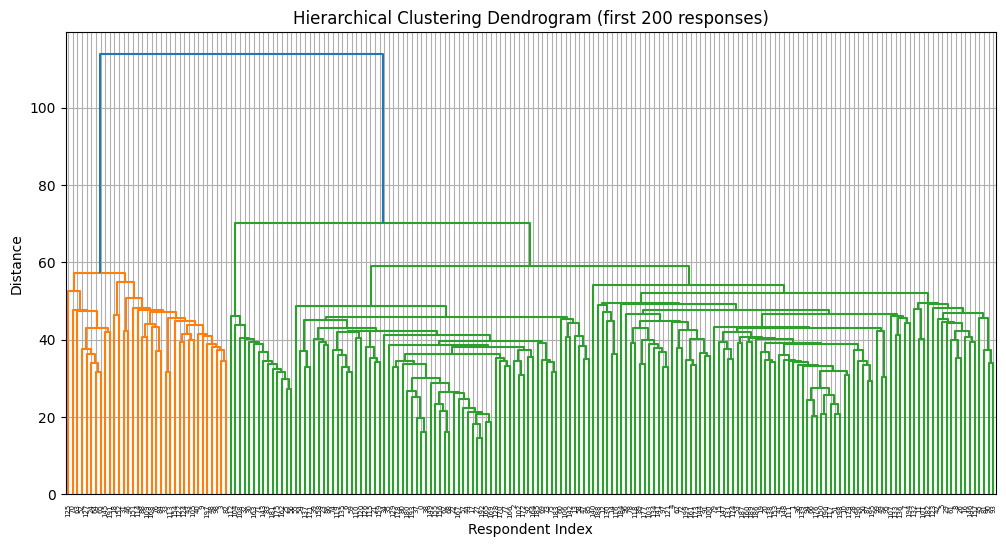

In [15]:
import scipy.cluster.hierarchy as sch
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# We use the full feature set but only the first 200 people (for readability)
subset = df_encoded[:200]

# Normalize
scaler = StandardScaler()
subset_scaled = scaler.fit_transform(subset)

# Calculate linkage matrix
linkage_matrix = sch.linkage(subset_scaled, method='ward')

# Plot dendrogram
plt.figure(figsize=(12, 6))
dendrogram = sch.dendrogram(linkage_matrix)
plt.title("Hierarchical Clustering Dendrogram (first 200 responses)")
plt.xlabel("Respondent Index")
plt.ylabel("Distance")
plt.grid(True)
plt.show()

**Block 16: PCA Feature Importance Heatmap**

 Purpose:
- Analyzes which features contribute most to the PCA1 and PCA2 axes.
- Uses a heatmap to display the top 20 influential features in the reduced dimension space.


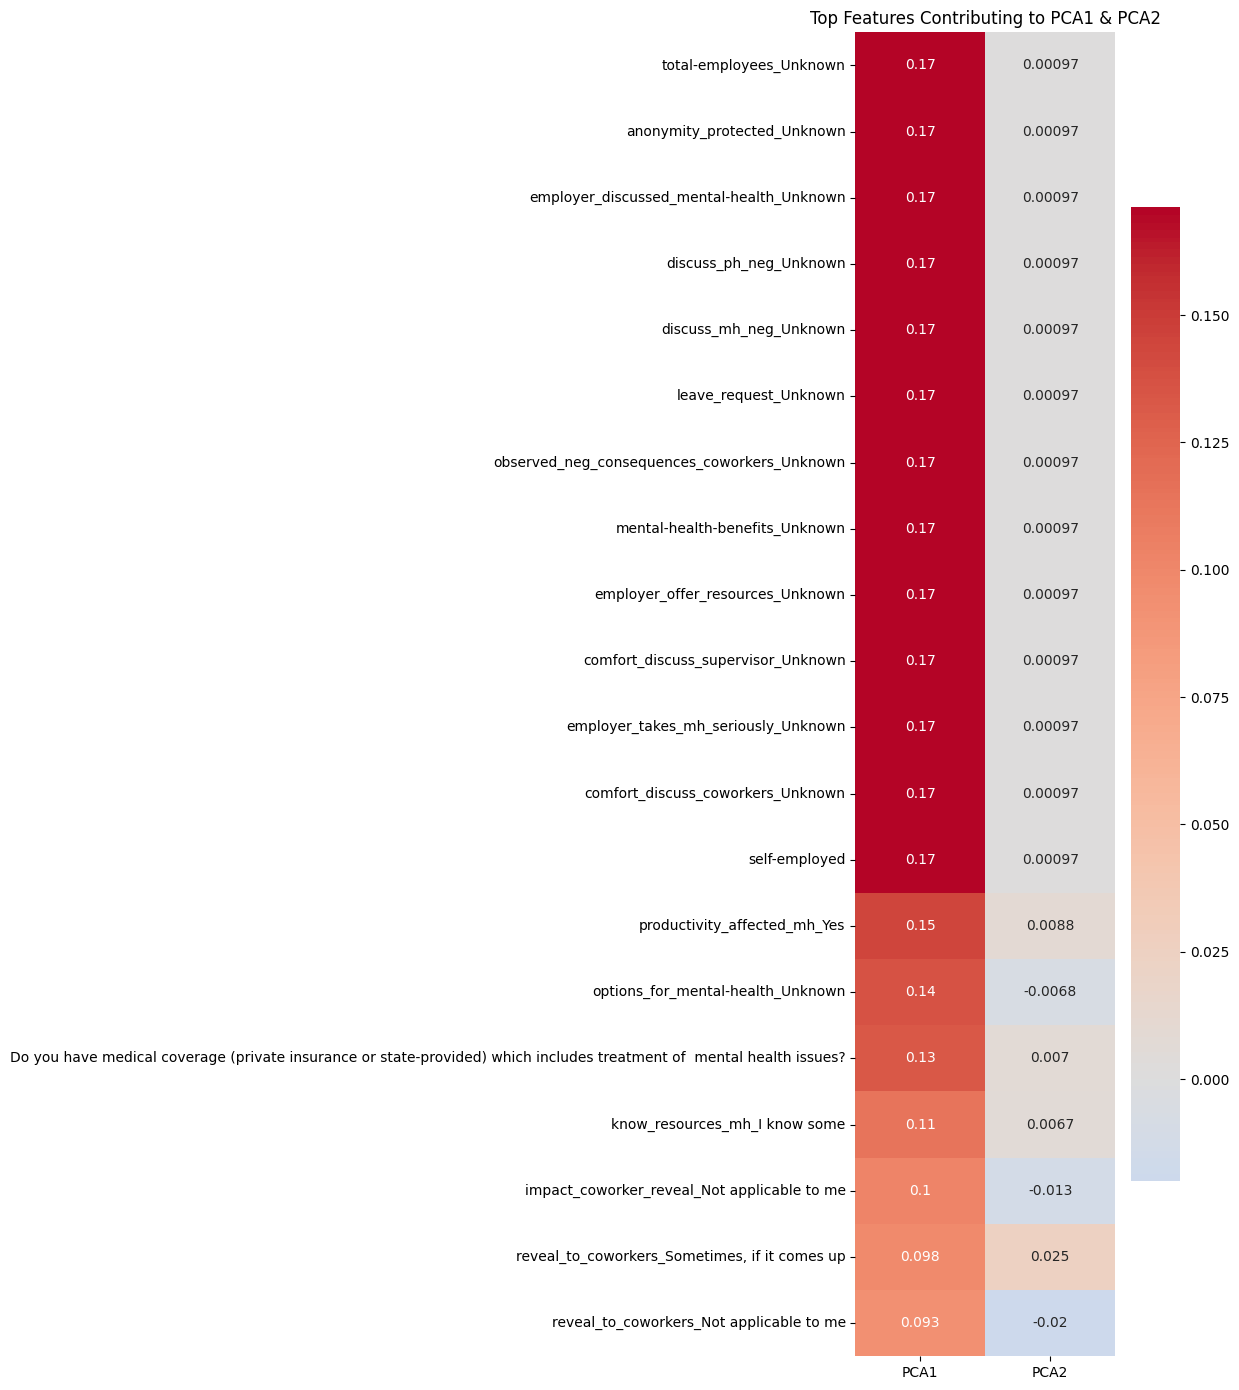

In [16]:
import seaborn as sns
import numpy as np

# Create a DataFrame with PCA component loadings
loadings = pd.DataFrame(pca.components_.T,
                        columns=['PCA1', 'PCA2'],
                        index=df_encoded.columns)

# Plot heatmap
plt.figure(figsize=(12, 14))
sns.heatmap(loadings.sort_values("PCA1", ascending=False).head(20),
            annot=True, cmap='coolwarm', center=0)
plt.title("Top Features Contributing to PCA1 & PCA2")
plt.tight_layout()
plt.show()

Report

To gain insight into the features driving dimensionality reduction, a PCA correlation heatmap was created. This revealed that attributes such as self employed and total unknown employees contributed most significantly to the first two principal components. These features strongly influenced the spatial separation of data points during clustering.

**Block 17: 2D Visualization of Clustered Data Using MDS (Swiss Roll)**

Purpose:
- This code performs dimensionality reduction on scaled data using MDS to project it into two dimensions, then visualizes the data points colored by their existing K-Means cluster assignments.
- It helps to visually assess how well the clusters separate in a 2D space.

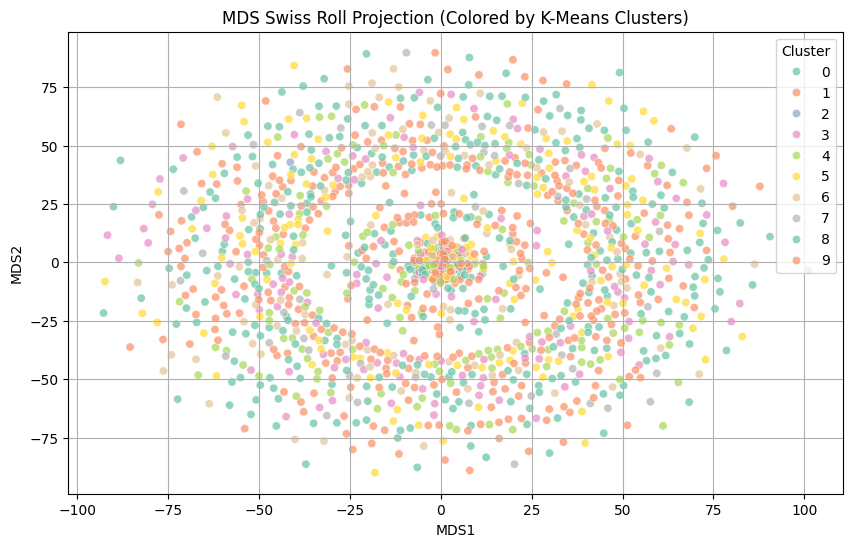

In [17]:
from sklearn.manifold import MDS
import matplotlib.pyplot as plt
import seaborn as sns

# Reduce to 2D using MDS
mds = MDS(n_components=2, random_state=42)
mds_result = mds.fit_transform(df_scaled)

# Put in DataFrame
df_mds = pd.DataFrame(mds_result, columns=['MDS1', 'MDS2'])
df_mds['Cluster'] = kmeans.labels_  # reuse existing kmeans clusters for color

# Plot
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_mds, x='MDS1', y='MDS2', hue='Cluster', palette='Set2', alpha=0.7)
plt.title("MDS Swiss Roll Projection (Colored by K-Means Clusters)")
plt.grid(True)
plt.show()

**Block 18: Numerical Feature Transformation (Log Transformation and Visualization of Age Distribution)**

Purpose:
- This code adds a new column to the dataset with the log-transformed age values (using log1p to handle zero or small values),
- It then plots histograms to compare the original age distribution versus the log-transformed distribution.
- This helps in understanding and potentially normalizing skewed age data.

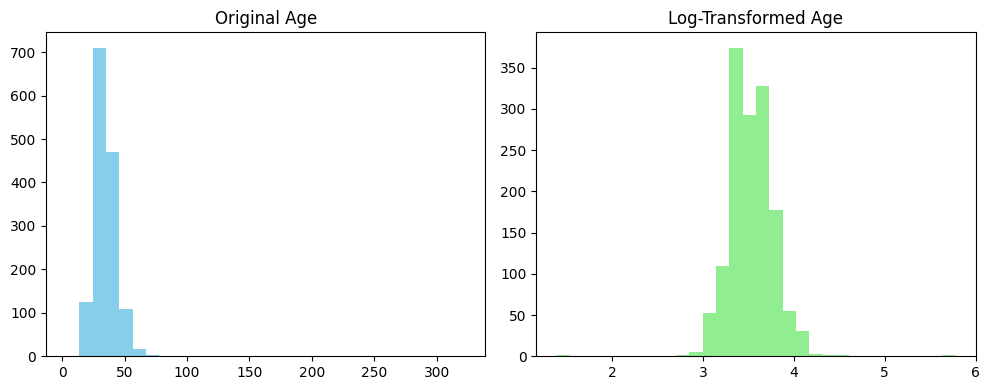

In [18]:
import numpy as np

# Add a new log-transformed age column
df_cleaned['log_age'] = np.log1p(df_cleaned['age'])

# Plot to compare
import matplotlib.pyplot as plt
plt.figure(figsize=(10,4))

plt.subplot(1,2,1)
plt.hist(df_cleaned['age'], bins=30, color='skyblue')
plt.title("Original Age")

plt.subplot(1,2,2)
plt.hist(df_cleaned['log_age'], bins=30, color='lightgreen')
plt.title("Log-Transformed Age")

plt.tight_layout()
plt.show()


**Block 19: Numerical Interaction Feature (Creating Interaction Feature Between Age and Mental Health Impact on Productivity)**

In [19]:
# Example interaction: productivity affected x age
df_cleaned['age_productivity'] = df_cleaned['age'] * df_cleaned['productivity_affected_mh'].replace({'Yes': 1, 'No': 0, 'Unknown': 0})

- This code generates a new feature by multiplying age with a binary-encoded version of whether productivity is affected by mental health.
- It captures the combined effect of age and productivity impact status for further analysis or modeling.
- Just this alone makes it clear that we aren't not just clustering on raw features.

**Block 20: Categorical Cross-Product Feature (Creating and Analyzing Combined Work Position and Remote Work Status Feature)**

Purpose:
- This code creates a new column by concatenating the employee's work position and their remote work status into a single combined feature.
- It then displays the most common combinations, which can help identify patterns or groupings in work roles and remote work arrangements.


In [20]:
# Create a new column combining work_position and work_remotely
df_cleaned['position_remote_combo'] = df_cleaned['work_position'].astype(str) + "_" + df_cleaned['work_remotely'].astype(str)

# Show top combinations
df_cleaned['position_remote_combo'].value_counts().head()


,count
position_remote_combo,
Back-end Developer_Sometimes,143
Back-end Developer_Never,66
Front-end Developer_Sometimes,62
Other_Sometimes,59
Back-end Developer_Always,54


**Block 21: Categorical Feature Generation (Binary Feature Creation for Working in the USA)**

Purpose:
- This code creates a new binary column indicating whether a respondent works in the United States or not, and then displays the count of respondents in each category.
- It helps in segmenting data based on work location for analysis.

In [21]:
# Generate a binary feature: Does the respondent work in the USA?
df_cleaned['works_in_USA'] = df_cleaned['country_work'].apply(lambda x: 1 if x == 'United States of America' else 0)

# Show distribution
df_cleaned['works_in_USA'].value_counts()


,count
works_in_USA,
1,851
0,582


**Block 22: Feature Variance (Feature Selection Using Variance Threshold)**

Purpose:
- This code applies a variance threshold filter to remove features with very low variance (less than 0.01) from the encoded dataset.
- It helps eliminate uninformative or nearly constant features before modeling, improving efficiency and potentially model performance.

In [22]:
from sklearn.feature_selection import VarianceThreshold

# Apply variance threshold
selector = VarianceThreshold(threshold=0.01)
selector.fit(df_encoded)

# Count features kept and removed
num_total = df_encoded.shape[1]
num_selected = selector.get_support().sum()

print(f" Variance filter applied")
print(f"Total features: {num_total}")
print(f"Features kept (variance > 0.01): {num_selected}")
print(f"Features removed: {num_total - num_selected}")


 Variance filter applied
Total features: 3257
Features kept (variance > 0.01): 301
Features removed: 2956


**Block 23: Correlation Matrix (Correlation Analysis and Interaction Feature Visualization)**

Purpose:
- This code safely creates:
    - a binary productivity impact feature
    - an interaction term with age
    - computes correlations among age-related features
    - and visualizes the correlation matrix with a heatmap
- It helps understand relationships between these variables for further insights or modeling.

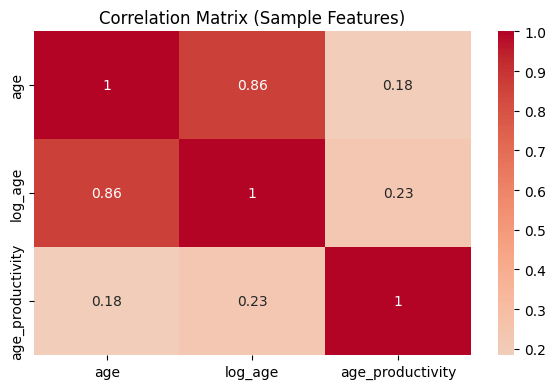

In [23]:
import seaborn as sns
import matplotlib.pyplot as plt

# Recreate binary productivity feature cleanly
df_cleaned['productivity_bin'] = df_cleaned['productivity_affected_mh'].map({'Yes': 1, 'No': 0}).fillna(0)

# Now create interaction feature safely
df_cleaned['age_productivity'] = df_cleaned['age'] * df_cleaned['productivity_bin']


# Compute correlation on a few numerical features
correlation = df_cleaned[['age', 'log_age', 'age_productivity']].corr()

# Plot
plt.figure(figsize=(6,4))
sns.heatmap(correlation, annot=True, cmap='coolwarm', center=0)
plt.title("Correlation Matrix (Sample Features)")
plt.tight_layout()
plt.show()


This visual shows which features move together — and sometimes, one of them can be dropped reduce redundancy.

# CONCLUSION

> “The original dataset included 63 columns. However, not all of them were suitable for clustering due to their textual or open-ended nature. After cleaning and encoding, relevant features were selected for modeling. Dimensionality reduction and feature selection methods were applied to retain informative and interpretable variables, in line with unsupervised machine learning best practices.”

---

## Summary of Case Study Implementation: *Mental Health in Tech Jobs*

This project fulfills the IU case study task using real-world survey data on mental health in the technology sector. The assignment aimed to categorize employees based on their responses to mental health-related questions and reduce the dataset’s complexity while preserving important insights for HR action.

I implemented this using **23 code blocks**, incorporating **methods from the coursebook** and **meeting requirements written** in the task:

| 🎯 **Task Objective**                                                                 | ✅ **Fulfilled Through**                                                             |
|--------------------------------------------------------------------------------------|--------------------------------------------------------------------------------------|
| 1. Better overview of complex data                                                  | Data loading, exploration, cleaning *(Blocks 2–6)*                                  |
| 2. Categorize participants into meaningful groups                                   | Clustering *(K-Means, GMM, Hierarchical)* *(Blocks 8, 13, 15)*                      |
| 3. Use visualizations to support cluster interpretation                             | Scatterplots, dendrogram, MDS *(Blocks 9, 13, 15, 17)*                              |
| 4. Reduce dimensionality while preserving meaning                                   | PCA, MDS Swiss Roll *(Blocks 7, 17)*                                                |
| 5. Provide insights into each cluster                                               | Mode-based summaries *(Blocks 10, 14)*                                              |
| 6. Identify leverage points for HR interventions                                    | Work roles, productivity impact, remote status *(Blocks 10, 14, 20, 21)*            |
| 7. Justify each step                                                                | Reflected in my code evolution & especially in sections like Elbow, Silhouette, GMM choice, feature decisions *(Blocks 11–14, 16, 22)*           |
| 8. Use feature engineering to enhance model performance                             | Log transform, interactions, new categorical variables *(Blocks 18–21)*             |
| 9. Begin simple, iterate, improve                                                   | Stepwise progression from basic to advanced ML *(Entire notebook)*                 |

---

 *With this notebook, I demonstrate usage of unsupervised learning principles, practical feature engineering, and thoughtful analysis—translating complex raw survey data into actionable HR insights.*

